## Assignment 1 (Data Visualization)

In [4]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [5]:
df=pd.read_csv('data.csv')

In [6]:
df.head(4)

,report_date,location,location_type,data_field,data_field_code,time_period,time_period_type,value,unit
0,2016-03-19,Argentina-Buenos_Aires,province,cumulative_confirmed_local_cases,AR0001,NaN,NaN,0,cases
1,2016-03-19,Argentina-Buenos_Aires,province,cumulative_probable_local_cases,AR0002,NaN,NaN,0,cases
2,2016-03-19,Argentina-Buenos_Aires,province,cumulative_confirmed_imported_cases,AR0003,NaN,NaN,2,cases
3,2016-03-19,Argentina-Buenos_Aires,province,cumulative_probable_imported_cases,AR0004,NaN,NaN,1,cases


In [7]:
df.shape

(107619, 9)

In [8]:
df.index

RangeIndex(start=0, stop=107619, step=1)

In [9]:
df.describe()

,time_period,time_period_type
count,0.0,0.0
mean,NaN,NaN
std,NaN,NaN
min,NaN,NaN
25%,NaN,NaN
50%,NaN,NaN
75%,NaN,NaN
max,NaN,NaN


In [10]:
df.dtypes

report_date          object
location             object
location_type        object
data_field           object
data_field_code      object
time_period         float64
time_period_type    float64
value                object
unit                 object
dtype: object

In [11]:
df.columns.tolist()

['report_date',
 'location',
 'location_type',
 'data_field',
 'data_field_code',
 'time_period',
 'time_period_type',
 'value',
 'unit']

### Cleaning the data by droping two columns(time_period and time_period_type) because it contain all null values.

In [12]:
df.drop(['time_period','time_period_type'],axis=1,inplace=True)


In [13]:
df.shape

(107619, 7)

In [14]:
df.head()

,report_date,location,location_type,data_field,data_field_code,value,unit
0,2016-03-19,Argentina-Buenos_Aires,province,cumulative_confirmed_local_cases,AR0001,0,cases
1,2016-03-19,Argentina-Buenos_Aires,province,cumulative_probable_local_cases,AR0002,0,cases
2,2016-03-19,Argentina-Buenos_Aires,province,cumulative_confirmed_imported_cases,AR0003,2,cases
3,2016-03-19,Argentina-Buenos_Aires,province,cumulative_probable_imported_cases,AR0004,1,cases
4,2016-03-19,Argentina-Buenos_Aires,province,cumulative_cases_under_study,AR0005,127,cases


In [15]:
len(df)

107619

In [16]:
len(df.location.unique())

1674

In [17]:
len(df.report_date.unique())

129

In [18]:
df['unit'].value_counts()

cases             106519
municipalities      1093
Name: unit, dtype: int64

### Since the data stored in the 'value' column are varying,so we need to make the data type same.

In [24]:
df['value'].value_counts()

0.0       70205
1.0        8423
2.0        4325
3.0        2518
4.0        1772
5.0        1340
6.0        1229
7.0         944
9.0         798
8.0         703
10.0        695
11.0        567
14.0        499
13.0        492
12.0        468
15.0        453
17.0        379
16.0        369
19.0        314
22.0        291
21.0        285
20.0        280
18.0        275
24.0        222
23.0        215
25.0        188
29.0        178
36.0        175
30.0        168
27.0        167
          ...  
1203.0        1
2424.0        1
2312.0        1
1142.0        1
6491.0        1
1717.0        1
3757.0        1
657.0         1
1113.0        1
1044.0        1
5490.0        1
573.0         1
617.0         1
1711.0        1
732.0         1
853.0         1
1948.0        1
631.0         1
1532.0        1
4678.0        1
2913.0        1
2742.0        1
6559.0        1
269.0         1
1201.0        1
1608.0        1
1626.0        1
559.0         1
1202.0        1
1038.0        1
Name: value, Length: 128

In [25]:
df['value']=pd.to_numeric(df['value'],errors='coerce')
df['value'].value_counts()

0.0       70205
1.0        8423
2.0        4325
3.0        2518
4.0        1772
5.0        1340
6.0        1229
7.0         944
9.0         798
8.0         703
10.0        695
11.0        567
14.0        499
13.0        492
12.0        468
15.0        453
17.0        379
16.0        369
19.0        314
22.0        291
21.0        285
20.0        280
18.0        275
24.0        222
23.0        215
25.0        188
29.0        178
36.0        175
30.0        168
27.0        167
          ...  
1203.0        1
2424.0        1
2312.0        1
1142.0        1
6491.0        1
1717.0        1
3757.0        1
657.0         1
1113.0        1
1044.0        1
5490.0        1
573.0         1
617.0         1
1711.0        1
732.0         1
853.0         1
1948.0        1
631.0         1
1532.0        1
4678.0        1
2913.0        1
2742.0        1
6559.0        1
269.0         1
1201.0        1
1608.0        1
1626.0        1
559.0         1
1202.0        1
1038.0        1
Name: value, Length: 128

In [26]:
df[df['value'].isnull()]

,report_date,location,location_type,data_field,data_field_code,value,unit
2018,2016-02-13,Brazil-Amapa,state,microcephaly_under_investigation,BR0001,NaN,cases
2019,2016-02-13,Brazil-Amazonas,state,microcephaly_under_investigation,BR0001,NaN,cases
2045,2016-02-13,Brazil-Amapa,state,microcephaly_confirmed,BR0002,NaN,cases
2046,2016-02-13,Brazil-Amazonas,state,microcephaly_confirmed,BR0002,NaN,cases
2072,2016-02-13,Brazil-Amapa,state,microcephaly_not,BR0003,NaN,cases
2073,2016-02-13,Brazil-Amazonas,state,microcephaly_not,BR0003,NaN,cases
2157,2016-02-20,Brazil-Amapa,state,microcephaly_confirmed,BR0002,NaN,cases
2158,2016-02-20,Brazil-Amazonas,state,microcephaly_confirmed,BR0002,NaN,cases
2184,2016-02-20,Brazil-Amapa,state,microcephaly_not,BR0003,NaN,cases
2185,2016-02-20,Brazil-Amazonas,state,microcephaly_not,BR0003,NaN,cases


In [27]:
df['value'].isnull().value_counts(dropna=False)

False    107478
True        141
Name: value, dtype: int64

### Droping null values from 'value' column

In [28]:
null_val=df[df['value'].isnull()]
null_val
b=null_val.index
b
df.drop(b,inplace=True)

In [29]:
df['value'].isnull().value_counts(dropna=False)

False    107478
Name: value, dtype: int64

In [30]:
df.shape

(107478, 7)

### The dates stored in the 'report_date' column have different formats,so we need to make them same.

In [31]:
df.query("report_date == '2016_02_04'")

,report_date,location,location_type,data_field,data_field_code,value,unit
104407,2016_02_04,Puerto_Rico,territory,zika_confirmed_4weeks,PR0001,15.0,cases
104408,2016_02_04,Puerto_Rico,territory,zika_confirmed_cumulative_2016,PR0003,12.0,cases
104409,2016_02_04,Puerto_Rico,territory,flavi_confirmed_cumulative_2016,PR0005,0.0,cases
104410,2016_02_04,Puerto_Rico,territory,zika_confirmed_cumulative_2015-2016,PR0006,21.0,cases
104411,2016_02_04,Puerto_Rico,territory,zika_confirmed_pregnant_cumulative_2015-2016,PR0007,1.0,cases
104412,2016_02_04,Puerto_Rico,territory,zika_confirmed_pregnant_symptomatic_cumulative...,PR0008,0.0,cases
104413,2016_02_04,Puerto_Rico,territory,zika_confirmed_pregnant_asymptomatic_cumulativ...,PR0009,0.0,cases
104414,2016_02_04,Puerto_Rico,territory,GBS_reported_cumulative_2015-2016,PR0010,0.0,cases
104415,2016_02_04,Puerto_Rico,territory,arbovirus_suspected_2weeks,PR0011,240.0,cases
104416,2016_02_04,Puerto_Rico,territory,arbovirus_suspected_cumulative_2016,PR0012,184.0,cases


In [32]:
df['report_date']=pd.to_datetime(df['report_date'],errors='coerce',format='%Y-%m-%d')
df.head(5)

,report_date,location,location_type,data_field,data_field_code,value,unit
0,2016-03-19,Argentina-Buenos_Aires,province,cumulative_confirmed_local_cases,AR0001,0.0,cases
1,2016-03-19,Argentina-Buenos_Aires,province,cumulative_probable_local_cases,AR0002,0.0,cases
2,2016-03-19,Argentina-Buenos_Aires,province,cumulative_confirmed_imported_cases,AR0003,2.0,cases
3,2016-03-19,Argentina-Buenos_Aires,province,cumulative_probable_imported_cases,AR0004,1.0,cases
4,2016-03-19,Argentina-Buenos_Aires,province,cumulative_cases_under_study,AR0005,127.0,cases


In [33]:
df.report_date.value_counts(dropna=False)

2016-04-23    4665
2016-03-26    4606
2016-04-02    4550
2016-04-16    4519
2016-04-09    4516
2016-05-14    4448
2016-05-07    4381
2016-05-28    4310
2016-05-21    4304
2016-04-30    4300
2016-06-04    4279
2016-03-19    3976
2016-06-18    3914
2016-03-12    3880
2016-03-05    3858
2016-02-20    3841
2016-02-27    3840
2016-02-13    3816
2016-06-11    3769
2016-02-06    3746
2016-01-23    3732
2016-01-16    3731
2016-01-30    3675
2016-06-25    3675
2016-01-09    3661
NaT            240
2016-07-02     213
2016-06-01     185
2016-04-13     167
2016-06-29     160
              ... 
2016-03-22      23
2016-05-05      14
2016-03-07      13
2016-01-14      12
2016-02-02      12
2015-12-16      11
2016-01-27      10
2016-01-26      10
2015-12-29       9
2015-12-23       9
2016-03-14       8
2015-12-09       7
2016-02-12       7
2016-02-11       7
2016-01-19       7
2016-03-28       4
2016-04-18       4
2016-04-04       4
2016-04-25       4
2016-03-11       4
2016-02-29       3
2016-02-22  

In [34]:
df.report_date.isnull().value_counts(dropna=False)

False    107238
True        240
Name: report_date, dtype: int64

### Droping null values from the 'report_date' column

In [35]:
null_val=df[df['report_date'].isnull()]
null_val

,report_date,location,location_type,data_field,data_field_code,value,unit
104407,NaT,Puerto_Rico,territory,zika_confirmed_4weeks,PR0001,15.0,cases
104408,NaT,Puerto_Rico,territory,zika_confirmed_cumulative_2016,PR0003,12.0,cases
104409,NaT,Puerto_Rico,territory,flavi_confirmed_cumulative_2016,PR0005,0.0,cases
104410,NaT,Puerto_Rico,territory,zika_confirmed_cumulative_2015-2016,PR0006,21.0,cases
104411,NaT,Puerto_Rico,territory,zika_confirmed_pregnant_cumulative_2015-2016,PR0007,1.0,cases
104412,NaT,Puerto_Rico,territory,zika_confirmed_pregnant_symptomatic_cumulative...,PR0008,0.0,cases
104413,NaT,Puerto_Rico,territory,zika_confirmed_pregnant_asymptomatic_cumulativ...,PR0009,0.0,cases
104414,NaT,Puerto_Rico,territory,GBS_reported_cumulative_2015-2016,PR0010,0.0,cases
104415,NaT,Puerto_Rico,territory,arbovirus_suspected_2weeks,PR0011,240.0,cases
104416,NaT,Puerto_Rico,territory,arbovirus_suspected_cumulative_2016,PR0012,184.0,cases


In [36]:
rep=null_val.index
rep

Int64Index([104407, 104408, 104409, 104410, 104411, 104412, 104413, 104414,
            104415, 104416,
            ...
            104647, 104648, 104649, 104650, 104651, 104652, 104653, 104654,
            104655, 104656],
           dtype='int64', length=240)

In [37]:
df.drop(rep,inplace=True)

In [38]:
df.report_date.isnull().value_counts(dropna=False)

False    107238
Name: report_date, dtype: int64

## Q1) show data field code 'AR0005' values for 'Argentina-Catamarca' for entire duration



In [39]:
df[(df.data_field_code == 'AR0005') & (df.location == 'Argentina-Catamarca')]

,report_date,location,location_type,data_field,data_field_code,value,unit
16,2016-03-19,Argentina-Catamarca,province,cumulative_cases_under_study,AR0005,14.0,cases
160,2016-03-26,Argentina-Catamarca,province,cumulative_cases_under_study,AR0005,15.0,cases
304,2016-04-02,Argentina-Catamarca,province,cumulative_cases_under_study,AR0005,15.0,cases
448,2016-04-09,Argentina-Catamarca,province,cumulative_cases_under_study,AR0005,15.0,cases
592,2016-04-16,Argentina-Catamarca,province,cumulative_cases_under_study,AR0005,15.0,cases
736,2016-04-29,Argentina-Catamarca,province,cumulative_cases_under_study,AR0005,15.0,cases
880,2016-05-07,Argentina-Catamarca,province,cumulative_cases_under_study,AR0005,16.0,cases
1024,2016-05-14,Argentina-Catamarca,province,cumulative_cases_under_study,AR0005,15.0,cases
1168,2016-05-22,Argentina-Catamarca,province,cumulative_cases_under_study,AR0005,16.0,cases
1312,2016-05-30,Argentina-Catamarca,province,cumulative_cases_under_study,AR0005,15.0,cases


## Q2 Plot 'Argentina-CABA' and 'Argentina-Catamarca' for number of cases values for entire duration to identify the difference.

In [40]:
caba=df.query("unit=='cases' & location == 'Argentina-CABA'")
cata=df.query("unit=='cases' & location == 'Argentina-Catamarca'")

In [41]:
result_1=caba.groupby('report_date')['value'].agg('sum')
result_1

report_date
2016-03-19     78.0
2016-03-26     92.0
2016-04-02     94.0
2016-04-09     97.0
2016-04-16     98.0
2016-04-29    101.0
2016-05-07    255.0
2016-05-14    126.0
2016-05-22    260.0
2016-05-30    132.0
2016-06-06    134.0
2016-06-13    136.0
2016-06-18    136.0
2016-06-26    160.0
Name: value, dtype: float64

In [42]:
result_2=cata.groupby('report_date')['value'].agg('sum')
result_2

report_date
2016-03-19    14.0
2016-03-26    15.0
2016-04-02    15.0
2016-04-09    15.0
2016-04-16    15.0
2016-04-29    15.0
2016-05-07    16.0
2016-05-14    15.0
2016-05-22    16.0
2016-05-30    15.0
2016-06-06    15.0
2016-06-13    15.0
2016-06-18    15.0
2016-06-26    16.0
Name: value, dtype: float64

In [44]:
get=pd.DataFrame([result_1,result_2],index=['Argentina-CABA','Argentina-Catamarca']).T
get

,Argentina-CABA,Argentina-Catamarca
report_date,,
2016-03-19,78.0,14.0
2016-03-26,92.0,15.0
2016-04-02,94.0,15.0
2016-04-09,97.0,15.0
2016-04-16,98.0,15.0
2016-04-29,101.0,15.0
2016-05-07,255.0,16.0
2016-05-14,126.0,15.0
2016-05-22,260.0,16.0


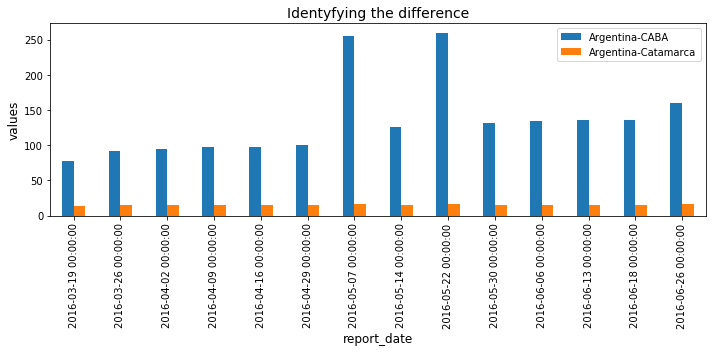

In [45]:
get.plot.bar()
plt.title('Identyfying the difference',fontsize=14)
plt.xlabel('report_date', fontsize=12)
plt.ylabel('values', fontsize=12)
plt.gcf().set_size_inches((10,5))
plt.legend()
plt.tight_layout()
plt.show()

## Q3. Plot how data field values are distributed across the locations 'Argentina-Buenos_Aires', 'Argentina-CABA', 'Argentina-Catamarca'

In [46]:
aires=df.query("location=='Argentina-Buenos_Aires'")
caba=df.query("location=='Argentina-CABA'") 
cata=df.query("location=='Argentina-Catamarca'")

In [47]:
aires

,report_date,location,location_type,data_field,data_field_code,value,unit
0,2016-03-19,Argentina-Buenos_Aires,province,cumulative_confirmed_local_cases,AR0001,0.0,cases
1,2016-03-19,Argentina-Buenos_Aires,province,cumulative_probable_local_cases,AR0002,0.0,cases
2,2016-03-19,Argentina-Buenos_Aires,province,cumulative_confirmed_imported_cases,AR0003,2.0,cases
3,2016-03-19,Argentina-Buenos_Aires,province,cumulative_probable_imported_cases,AR0004,1.0,cases
4,2016-03-19,Argentina-Buenos_Aires,province,cumulative_cases_under_study,AR0005,127.0,cases
5,2016-03-19,Argentina-Buenos_Aires,province,cumulative_cases_discarded,AR0006,0.0,cases
144,2016-03-26,Argentina-Buenos_Aires,province,cumulative_confirmed_local_cases,AR0001,0.0,cases
145,2016-03-26,Argentina-Buenos_Aires,province,cumulative_probable_local_cases,AR0002,0.0,cases
146,2016-03-26,Argentina-Buenos_Aires,province,cumulative_confirmed_imported_cases,AR0003,2.0,cases
147,2016-03-26,Argentina-Buenos_Aires,province,cumulative_probable_imported_cases,AR0004,1.0,cases


In [48]:
a1=aires.groupby('data_field')['value'].agg('sum')
a1

data_field
cumulative_cases_discarded              251.0
cumulative_cases_under_study           2981.0
cumulative_confirmed_imported_cases      32.0
cumulative_confirmed_local_cases          0.0
cumulative_probable_imported_cases       15.0
cumulative_probable_local_cases           0.0
Name: value, dtype: float64

In [49]:
b1=caba.groupby('data_field')['value'].agg('sum')
b1


data_field
cumulative_cases_discarded               27.0
cumulative_cases_under_study           1748.0
cumulative_confirmed_imported_cases     124.0
cumulative_confirmed_local_cases          0.0
cumulative_probable_imported_cases        0.0
cumulative_probable_local_cases           0.0
Name: value, dtype: float64

In [50]:
c1=cata.groupby('data_field')['value'].agg('sum')
c1

data_field
cumulative_cases_discarded               0.0
cumulative_cases_under_study           212.0
cumulative_confirmed_imported_cases      0.0
cumulative_confirmed_local_cases         0.0
cumulative_probable_imported_cases       0.0
cumulative_probable_local_cases          0.0
Name: value, dtype: float64

In [51]:
list1=list(a1.values)
list2=list(b1.values)
list3=list(c1.values)

list1,list2,list3

([251.0, 2981.0, 32.0, 0.0, 15.0, 0.0],
 [27.0, 1748.0, 124.0, 0.0, 0.0, 0.0],
 [0.0, 212.0, 0.0, 0.0, 0.0, 0.0])

In [52]:
x=('cumulative_cases_discarded','cumulative_cases_under_study','cumulative_confirmed_imported_cases','cumulative_confirmed_local_cases','cumulative_probable_imported_cases',
'cumulative_probable_local_cases')
labels=('Argentina-Buenos_Aires', 'Argentina-CABA', 'Argentina-Catamarca')

Text(0.5, 0, 'data_field')

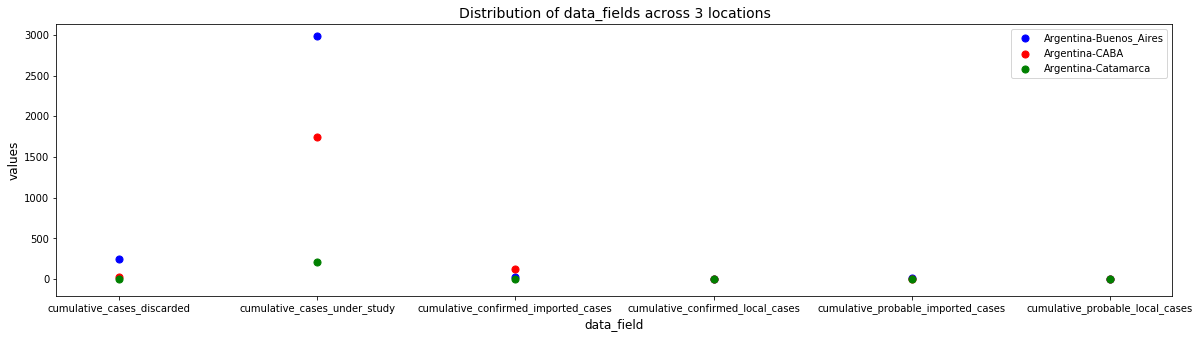

In [54]:
plt.scatter(x,list1,color='b',s=50)
plt.scatter(x,list2,color='r',s=50)
plt.scatter(x,list3,color='g',s=50)
plt.gcf().set_size_inches((20,5))
plt.title('Distribution of data_fields across 3 locations',fontsize=14)
plt.legend(labels,loc='best')
plt.ylabel('values',fontsize=12)
plt.xlabel('data_field',fontsize=12)

## 4. Build a program to predict the correct word for wrongly typed word. for example whst => what, numbr =>number, good => good
## Hint : identify most common mistakes that can occur during typing and use big text corpus(big.txt)

In [ ]:
#Spell checker using difflib

from difflib import SequenceMatcher, get_close_matches
import re     #importing re to use findall() function

def words(text):
    return re.findall(r'\w+', text.lower())

wordList = words(open('big.txt').read())

while(True):
    str1 = input('Enter a Word that you want to check... : ')
    correction = get_close_matches(str1, wordList, n=2,cutoff=0.6)
    if str1=='exit' or str1=='Exit':
        break
    elif correction[0] == str1:
        print('CONGRATS,Your word is correct !!!')
    else:
        print('Did you mean: {}'.format(correction))

Enter a Word that you want to check... : amazzing
Did you mean: ['amazing', 'amazing']
Enter a Word that you want to check... : business
CONGRATS,Your word is correct !!!
